# TF 1.13.1 installation

In [1]:
# install tensorflow version 1.13.1 as per assignment requirement
!pip install tensorflow==1.13.1

# check tensorflow version to make sure it is 1.13.1
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


# Import modules and load dataset

In [2]:
import math
import numpy as np
import pandas as pd
import logging
logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn import preprocessing

import time

# load data
data = pd.read_csv('online_shoppers_intention.csv')

# Data Exploration

Investigate the dataset and the class labels

In [3]:
# look at how the dataset looks like
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# display label ratio
data['Revenue'].value_counts()

# (1) there is an imbalance in the label proportion in the dataset, being heavily 
#     skewed towards False (online shoppers with no intention of purchasing).

False    10422
True      1908
Name: Revenue, dtype: int64

(-1.106446045517293,
 1.1056577763870046,
 -1.1054251151897765,
 1.1002583547909133)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal

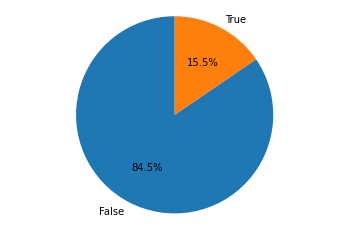

In [6]:
# display as piechart for easier interpretation
piechart_labels = ['False', 'True']
sizes = data['Revenue'].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=piechart_labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

Investigate the various attributes - Dropped attributes

In [7]:
print(data['Administrative'].value_counts())
print(data['Informational'].value_counts())

# (1) unclear of what administrative represents
# (2) there is a tendency to aggregate towards the first few categories in the dataset,
#     creating a small variance in the attribute

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64


In [8]:
data['ProductRelated'].value_counts()

# (1) May be relevant, however there is a huge number of categories
# (2) Is evenly spread out amongst all its categories
# (3) Each category will contribute very little, hence likely to be less relevant
#     compared to other attributes

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

(-1.1004451387038707,
 1.1000337113107264,
 -1.1000050786775117,
 1.1000002418417862)

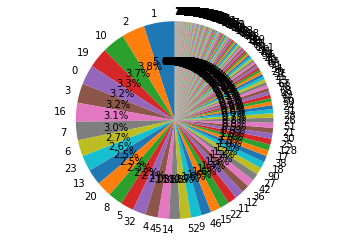

In [9]:
# display as piechart for easier interpretation
piechart_labels = [i for i in data['ProductRelated'].unique().tolist()]
sizes = data['ProductRelated'].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=piechart_labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

In [10]:
print(data['OperatingSystems'].value_counts())
print(data['Browser'].value_counts())

# (1) low variance
# (2) most likely useless as the platform the shoppers use does not really affect
#     their purchase decisions

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


Investigate the various attributes - Categorical attributes



In [11]:
data['Month'].value_counts()

# (1) Missing January and April
# (2) needed to include missing months as datapoints can be collected anytime of
#     the year

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [12]:
print(data['Region'].value_counts())
print(data['TrafficType'].value_counts())

# (1) has relatively low variance, but are potentially relevant data
# (2) consider grouping categories with <1000 instances as "others" to reduce
#     number of categories for the attribute

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


In [13]:
print(data['VisitorType'].value_counts())
print(data['Weekend'].value_counts())

# (1) relevant data

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
False    9462
True     2868
Name: Weekend, dtype: int64


Investigate the various attributes - Ranging attributes

In [14]:
print(data['Administrative_Duration'])
print(data['Informational_Duration'])
print(data['ProductRelated_Duration'])

# (1) these are potentially relevant attributes

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
12325    145.0
12326      0.0
12327      0.0
12328     75.0
12329      0.0
Name: Administrative_Duration, Length: 12330, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Informational_Duration, Length: 12330, dtype: float64
0           0.000000
1          64.000000
2           0.000000
3           2.666667
4         627.500000
            ...     
12325    1783.791667
12326     465.750000
12327     184.250000
12328     346.000000
12329      21.250000
Name: ProductRelated_Duration, Length: 12330, dtype: float64


In [15]:
print(data['BounceRates'])
print(data['ExitRates'])
print(data['PageValues'])
print(data['SpecialDay'])

# (1) relevant attributes that directly relate to the purchasing behaviour of shoppers

0        0.200000
1        0.000000
2        0.200000
3        0.050000
4        0.020000
           ...   
12325    0.007143
12326    0.000000
12327    0.083333
12328    0.000000
12329    0.000000
Name: BounceRates, Length: 12330, dtype: float64
0        0.200000
1        0.100000
2        0.200000
3        0.140000
4        0.050000
           ...   
12325    0.029031
12326    0.021333
12327    0.086667
12328    0.021053
12329    0.066667
Name: ExitRates, Length: 12330, dtype: float64
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
12325    12.241717
12326     0.000000
12327     0.000000
12328     0.000000
12329     0.000000
Name: PageValues, Length: 12330, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: SpecialDay, Length: 12330, dtype: float64


# Data Preprocessing and Splitting

In [16]:
# remove unnecessary columns
new_data = data.drop(['OperatingSystems', 'Browser', 'Administrative', 'Informational', 'ProductRelated'], axis=1)

# split columns into sections according to their data type (categories or ranged values) in the dataset
columns_category = ['Month', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
columns_value = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', \
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


# normalize ranged value data
df_values = new_data.drop(columns_category, axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
norm = min_max_scaler.fit_transform(df_values.values)
df_norm = pd.DataFrame(norm, columns=columns_value)


# copy dataframe to retain original
df = new_data

# replace the values in Region and TrafficType columns to 'others' 
# when that value has a total count of < 1000 in the dataset
for val in df['Region'].unique():
  if val not in df['Region'].value_counts()[df['Region'].value_counts() > 1000].index.tolist():
    df_series = df['Region'].replace(val, 0) # 'others class'
    df['Region'] = df_series

for val in df['TrafficType']:
  if val not in df['TrafficType'].value_counts()[df['TrafficType'].value_counts() > 1000].index.tolist():
    df_series = df['TrafficType'].replace(val, 0) # 'others class'
    df['TrafficType'] = df_series


# one-hot encode categorical data
df = df.replace(False, 'F').replace(True, 'T')
for i in range(max(data['TrafficType'].unique())):
  df = df.replace(i, f'{i}')

df_onehot = pd.get_dummies(df[columns_category])


# fill in missing columns for "Month" attribute
df_onehot['Month_Jan'] = pd.Series([0 for i in range(len(df_onehot))], index=df_onehot.index)
df_onehot['Month_Apr'] = pd.Series([0 for i in range(len(df_onehot))], index=df_onehot.index)


# rearrange columns
cols = ['Month_Jan', 'Month_Feb', 'Month_Mar', 'Month_Apr', 'Month_May', 'Month_June', \
        'Month_Jul', 'Month_Aug', 'Month_Sep', 'Month_Oct', 'Month_Nov', 'Month_Dec', \
        'Region_0', 'Region_1', 'Region_2', 'Region_3', 'Region_4', \
        'TrafficType_0', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', \
        'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor', 'VisitorType_Other', \
        'Weekend_F', 'Weekend_T', \
        'Revenue_F', 'Revenue_T']
df_onehot = df_onehot[cols]


# join all separate sub-dataframes into a final dataframe
dframe = df_norm.join(df_onehot)


# seed randomness for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_random_seed(seed)


# separate dataset into their respective labels for processing
true_class_df = dframe[dframe['Revenue_T'] == 1]
false_class_df = dframe[dframe['Revenue_F'] == 1]

true_class_df = true_class_df.sample(frac=1)
false_class_df = false_class_df.sample(frac=1)


# split into train : valid : test datasets
train_dfs = [true_class_df[:1000], false_class_df[:1000]]
valid_dfs = [true_class_df[1000:1500], false_class_df[1000:1500]]
test_dfs = [true_class_df[1500:], false_class_df[1500:len(true_class_df)]]

final_train_dataframe = pd.concat(train_dfs)
final_valid_dataframe = pd.concat(valid_dfs)
final_test_dataframe = pd.concat(test_dfs)


# shuffle the dataset so datapoint allocation is evenly distributed
final_train_dataframe = final_train_dataframe.sample(frac=1)
final_valid_dataframe = final_valid_dataframe.sample(frac=1)
final_test_dataframe = final_test_dataframe.sample(frac=1)


# split the dataset into the data and the labels
df_data_train = final_train_dataframe.drop(['Revenue_F', 'Revenue_T'], axis=1)
df_data_valid = final_valid_dataframe.drop(['Revenue_F', 'Revenue_T'], axis=1)
df_data_test = final_test_dataframe.drop(['Revenue_F', 'Revenue_T'], axis=1)
df_label_train = final_train_dataframe[['Revenue_F', 'Revenue_T']]
df_label_valid = final_valid_dataframe[['Revenue_F', 'Revenue_T']]
df_label_test = final_test_dataframe[['Revenue_F', 'Revenue_T']]

# parse dataframes to 2D numpy array for training
data_train = np.array(df_data_train)
data_valid = np.array(df_data_valid)
data_test = np.array(df_data_test)
label_train = np.array(df_label_train)
label_valid = np.array(df_label_valid)
label_test = np.array(df_label_test)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


# Parameters

In [17]:
# Network parameters
n_input = final_train_dataframe.shape[1] - 2  # 2 columns reserved for the labels
n_output = 2 # False class and True class

# Training parameters
number_grid_epochs = 300
number_cv_epochs = 200
number_final_epochs = 500
batch_size = 200


# Hyperparameters
optimizer_selection = ['adam', 'sgd']
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]


# Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

# Building the network

In [18]:
# build the varying networks for evaluation

class Simple_Network(tf.keras.Model):

  def __init__(self, n_input, n_output):
    super(Simple_Network, self).__init__()

    # set the weights and biases
    self.w1_1 = tf.Variable(initial_value=tf.random_normal([27, 14]), trainable=True)
    self.w1_2 = tf.Variable(initial_value=tf.random_normal([14, 7]), trainable=True)
    self.w2_1 = tf.Variable(initial_value=tf.random_normal([14, 7]), trainable=True)
    self.w3_1 = tf.Variable(initial_value=tf.random_normal([7, n_output]), trainable=True)
    self.b1_1 = tf.Variable(initial_value=tf.random_normal([14]), trainable=True)
    self.b1_2 = tf.Variable(initial_value=tf.random_normal([7]), trainable=True)
    self.b2_1 = tf.Variable(initial_value=tf.random_normal([7]), trainable=True)
    self.b3_1 = tf.Variable(initial_value=tf.random_normal([n_output]), trainable=True)


  def call(self, input_data):
    branch1_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_data[:, 7:], self.w1_1), self.b1_1))
    branch1_2 = tf.nn.sigmoid(tf.add(tf.matmul(branch1_1, self.w1_2), self.b1_2))
    concat_layer = tf.concat([branch1_2, input_data[:, :7]], 1)
    out = tf.nn.sigmoid(tf.add(tf.matmul(concat_layer, self.w2_1), self.b2_1))
    out = tf.nn.sigmoid(tf.add(tf.matmul(out, self.w3_1), self.b3_1))

    return out


# Conduct for evaluating different hyperparameters combinations

Hyperparameter combination: (optimizer, learning_rate)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Optimizer: adam | Learning rate: 0.01
Epoch: 5 / 300	Avg Loss: 7.998104572296143	Time elapsed: 0.1387348175048828s
Epoch: 10 / 300	Avg Loss: 7.968042850494385	Time elapsed: 0.1594071388244629s
Epoch: 15 / 300	Avg Loss: 7.937492847442627	Time elapsed: 0.17977619171142578s
Epoch: 20 / 300	Avg Loss: 7.903252124786377	Time elapsed: 0.1987597942352295s
Epoch: 25 / 300	Avg Loss: 7.865448474884033	Time elapsed: 0.21937274932861328s
Epoch: 30 / 300	Avg Loss: 7.829660415649414	Time elapsed: 0.23852205276489258s
Epoch: 35 / 300	Avg Loss: 7.794062614440918	Time elapsed: 0.25803089141845703s
Epoch: 40 / 300	Avg Loss: 7.757936477661133	Time elapsed: 0.27659153938293457s
Epoch: 45 / 300	Avg Loss: 7.719994068145752	Time elapsed: 0.29907679557800293s
Epoch: 50 / 300	Avg Loss: 7.682662010192871	Time elapsed: 0.3246440887451172s
Epoch: 55 / 300	Avg Loss: 7.648724555969238	Time elapsed: 0.3448643684387207s
Epoch: 60 / 300	Avg Loss: 7.617348670959473	Time elapsed: 0.36415982246398926s
Epoch: 65 / 300	Avg 

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal

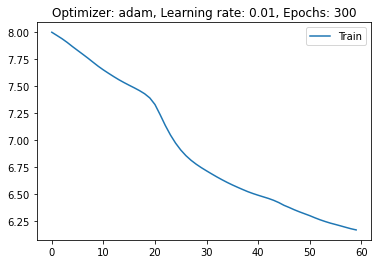

Optimizer: adam | Learning rate: 0.05
Epoch: 5 / 300	Avg Loss: 7.891927719116211	Time elapsed: 0.15703034400939941s
Epoch: 10 / 300	Avg Loss: 7.752425670623779	Time elapsed: 0.1774430274963379s
Epoch: 15 / 300	Avg Loss: 7.634149074554443	Time elapsed: 0.19646215438842773s
Epoch: 20 / 300	Avg Loss: 7.530951976776123	Time elapsed: 0.21558356285095215s
Epoch: 25 / 300	Avg Loss: 7.455168724060059	Time elapsed: 0.23435282707214355s
Epoch: 30 / 300	Avg Loss: 7.402259826660156	Time elapsed: 0.2528371810913086s
Epoch: 35 / 300	Avg Loss: 7.3275065422058105	Time elapsed: 0.2723512649536133s
Epoch: 40 / 300	Avg Loss: 7.106160640716553	Time elapsed: 0.29189515113830566s
Epoch: 45 / 300	Avg Loss: 6.85227632522583	Time elapsed: 0.31036853790283203s
Epoch: 50 / 300	Avg Loss: 6.692360877990723	Time elapsed: 0.3296642303466797s
Epoch: 55 / 300	Avg Loss: 6.591240406036377	Time elapsed: 0.3496439456939697s
Epoch: 60 / 300	Avg Loss: 6.5171308517456055	Time elapsed: 0.37258362770080566s
Epoch: 65 / 300	Avg

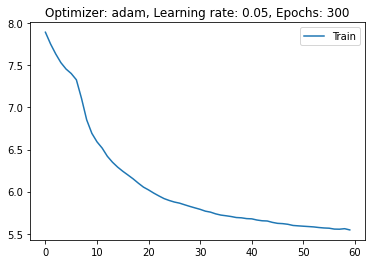

Optimizer: adam | Learning rate: 0.1
Epoch: 5 / 300	Avg Loss: 7.773475646972656	Time elapsed: 0.1886751651763916s
Epoch: 10 / 300	Avg Loss: 7.568888187408447	Time elapsed: 0.20828628540039062s
Epoch: 15 / 300	Avg Loss: 7.437891006469727	Time elapsed: 0.22701382637023926s
Epoch: 20 / 300	Avg Loss: 7.364969730377197	Time elapsed: 0.2454087734222412s
Epoch: 25 / 300	Avg Loss: 7.211840629577637	Time elapsed: 0.26473116874694824s
Epoch: 30 / 300	Avg Loss: 6.779413223266602	Time elapsed: 0.2835860252380371s
Epoch: 35 / 300	Avg Loss: 6.565394401550293	Time elapsed: 0.3023357391357422s
Epoch: 40 / 300	Avg Loss: 6.4284844398498535	Time elapsed: 0.32068395614624023s
Epoch: 45 / 300	Avg Loss: 6.3198676109313965	Time elapsed: 0.33907270431518555s
Epoch: 50 / 300	Avg Loss: 6.218667984008789	Time elapsed: 0.35848474502563477s
Epoch: 55 / 300	Avg Loss: 6.130558013916016	Time elapsed: 0.3775138854980469s
Epoch: 60 / 300	Avg Loss: 6.059039115905762	Time elapsed: 0.4000513553619385s
Epoch: 65 / 300	Avg 

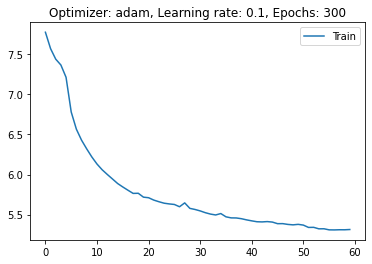

Optimizer: adam | Learning rate: 0.2
Epoch: 5 / 300	Avg Loss: 7.6205735206604	Time elapsed: 0.41802501678466797s
Epoch: 10 / 300	Avg Loss: 7.396163463592529	Time elapsed: 0.44170570373535156s
Epoch: 15 / 300	Avg Loss: 7.061689853668213	Time elapsed: 0.46454477310180664s
Epoch: 20 / 300	Avg Loss: 6.5773468017578125	Time elapsed: 0.4881010055541992s
Epoch: 25 / 300	Avg Loss: 6.3513875007629395	Time elapsed: 0.5128238201141357s
Epoch: 30 / 300	Avg Loss: 6.2036213874816895	Time elapsed: 0.5345220565795898s
Epoch: 35 / 300	Avg Loss: 6.086114406585693	Time elapsed: 0.5555737018585205s
Epoch: 40 / 300	Avg Loss: 6.007654190063477	Time elapsed: 0.5785295963287354s
Epoch: 45 / 300	Avg Loss: 5.934242248535156	Time elapsed: 0.6043577194213867s
Epoch: 50 / 300	Avg Loss: 5.87550687789917	Time elapsed: 0.631061315536499s
Epoch: 55 / 300	Avg Loss: 5.819913864135742	Time elapsed: 0.6568160057067871s
Epoch: 60 / 300	Avg Loss: 5.77719259262085	Time elapsed: 0.6781637668609619s
Epoch: 65 / 300	Avg Loss: 5

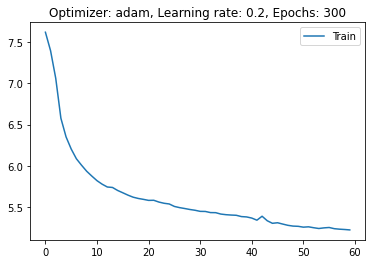

Optimizer: adam | Learning rate: 0.3
Epoch: 5 / 300	Avg Loss: 7.593810081481934	Time elapsed: 0.2751789093017578s
Epoch: 10 / 300	Avg Loss: 6.878605365753174	Time elapsed: 0.2978067398071289s
Epoch: 15 / 300	Avg Loss: 6.5435943603515625	Time elapsed: 0.3205726146697998s
Epoch: 20 / 300	Avg Loss: 6.308806896209717	Time elapsed: 0.3418593406677246s
Epoch: 25 / 300	Avg Loss: 6.160338878631592	Time elapsed: 0.36185574531555176s
Epoch: 30 / 300	Avg Loss: 6.035114288330078	Time elapsed: 0.3808419704437256s
Epoch: 35 / 300	Avg Loss: 5.913630962371826	Time elapsed: 0.40093517303466797s
Epoch: 40 / 300	Avg Loss: 5.88071870803833	Time elapsed: 0.421184778213501s
Epoch: 45 / 300	Avg Loss: 5.756501197814941	Time elapsed: 0.44121503829956055s
Epoch: 50 / 300	Avg Loss: 5.689263820648193	Time elapsed: 0.461667537689209s
Epoch: 55 / 300	Avg Loss: 5.605512619018555	Time elapsed: 0.48736047744750977s
Epoch: 60 / 300	Avg Loss: 5.548237323760986	Time elapsed: 0.5110552310943604s
Epoch: 65 / 300	Avg Loss: 

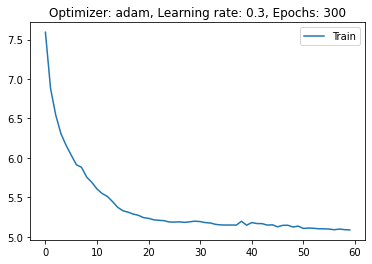

Optimizer: sgd | Learning rate: 0.01
Epoch: 5 / 300	Avg Loss: 8.020094871520996	Time elapsed: 0.231278657913208s
Epoch: 10 / 300	Avg Loss: 8.019906997680664	Time elapsed: 0.25632667541503906s
Epoch: 15 / 300	Avg Loss: 8.0197172164917	Time elapsed: 0.2769129276275635s
Epoch: 20 / 300	Avg Loss: 8.019526481628418	Time elapsed: 0.2958080768585205s
Epoch: 25 / 300	Avg Loss: 8.01933479309082	Time elapsed: 0.31479549407958984s
Epoch: 30 / 300	Avg Loss: 8.019139289855957	Time elapsed: 0.3371405601501465s
Epoch: 35 / 300	Avg Loss: 8.01894474029541	Time elapsed: 0.35785484313964844s
Epoch: 40 / 300	Avg Loss: 8.018745422363281	Time elapsed: 0.38147950172424316s
Epoch: 45 / 300	Avg Loss: 8.018548011779785	Time elapsed: 0.4014768600463867s
Epoch: 50 / 300	Avg Loss: 8.018346786499023	Time elapsed: 0.4200923442840576s
Epoch: 55 / 300	Avg Loss: 8.018143653869629	Time elapsed: 0.44328951835632324s
Epoch: 60 / 300	Avg Loss: 8.017940521240234	Time elapsed: 0.4627699851989746s
Epoch: 65 / 300	Avg Loss: 8.

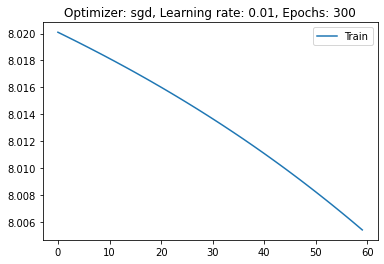

Optimizer: sgd | Learning rate: 0.05
Epoch: 5 / 300	Avg Loss: 8.01933479309082	Time elapsed: 0.3216571807861328s
Epoch: 10 / 300	Avg Loss: 8.018349647521973	Time elapsed: 0.34330105781555176s
Epoch: 15 / 300	Avg Loss: 8.01732063293457	Time elapsed: 0.3648366928100586s
Epoch: 20 / 300	Avg Loss: 8.016242980957031	Time elapsed: 0.3850982189178467s
Epoch: 25 / 300	Avg Loss: 8.015114784240723	Time elapsed: 0.40455055236816406s
Epoch: 30 / 300	Avg Loss: 8.013930320739746	Time elapsed: 0.42273449897766113s
Epoch: 35 / 300	Avg Loss: 8.012685775756836	Time elapsed: 0.4414029121398926s
Epoch: 40 / 300	Avg Loss: 8.011380195617676	Time elapsed: 0.46468520164489746s
Epoch: 45 / 300	Avg Loss: 8.010007858276367	Time elapsed: 0.4847249984741211s
Epoch: 50 / 300	Avg Loss: 8.008566856384277	Time elapsed: 0.5035858154296875s
Epoch: 55 / 300	Avg Loss: 8.00705337524414	Time elapsed: 0.5222897529602051s
Epoch: 60 / 300	Avg Loss: 8.005465507507324	Time elapsed: 0.5428147315979004s
Epoch: 65 / 300	Avg Loss: 8

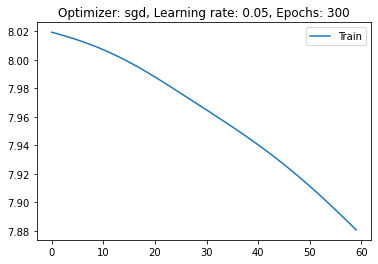

Optimizer: sgd | Learning rate: 0.1
Epoch: 5 / 300	Avg Loss: 8.018355369567871	Time elapsed: 0.2926633358001709s
Epoch: 10 / 300	Avg Loss: 8.016252517700195	Time elapsed: 0.31201171875s
Epoch: 15 / 300	Avg Loss: 8.013947486877441	Time elapsed: 0.33050036430358887s
Epoch: 20 / 300	Avg Loss: 8.011405944824219	Time elapsed: 0.35604095458984375s
Epoch: 25 / 300	Avg Loss: 8.0086030960083	Time elapsed: 0.37611818313598633s
Epoch: 30 / 300	Avg Loss: 8.00551700592041	Time elapsed: 0.3964056968688965s
Epoch: 35 / 300	Avg Loss: 8.002130508422852	Time elapsed: 0.41608262062072754s
Epoch: 40 / 300	Avg Loss: 7.998444557189941	Time elapsed: 0.43567466735839844s
Epoch: 45 / 300	Avg Loss: 7.994474411010742	Time elapsed: 0.4564075469970703s
Epoch: 50 / 300	Avg Loss: 7.990258693695068	Time elapsed: 0.4752376079559326s
Epoch: 55 / 300	Avg Loss: 7.985846519470215	Time elapsed: 0.493760347366333s
Epoch: 60 / 300	Avg Loss: 7.981299877166748	Time elapsed: 0.5154209136962891s
Epoch: 65 / 300	Avg Loss: 7.97667

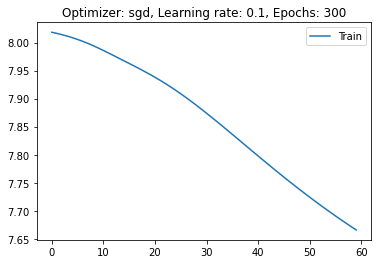

Optimizer: sgd | Learning rate: 0.2
Epoch: 5 / 300	Avg Loss: 8.01627254486084	Time elapsed: 0.3670785427093506s
Epoch: 10 / 300	Avg Loss: 8.011458396911621	Time elapsed: 0.39050912857055664s
Epoch: 15 / 300	Avg Loss: 8.005619049072266	Time elapsed: 0.4128899574279785s
Epoch: 20 / 300	Avg Loss: 7.998605251312256	Time elapsed: 0.43611907958984375s
Epoch: 25 / 300	Avg Loss: 7.990482330322266	Time elapsed: 0.4577047824859619s
Epoch: 30 / 300	Avg Loss: 7.9815754890441895	Time elapsed: 0.4783480167388916s
Epoch: 35 / 300	Avg Loss: 7.97233772277832	Time elapsed: 0.4984402656555176s
Epoch: 40 / 300	Avg Loss: 7.963042736053467	Time elapsed: 0.5183403491973877s
Epoch: 45 / 300	Avg Loss: 7.953621864318848	Time elapsed: 0.5405032634735107s
Epoch: 50 / 300	Avg Loss: 7.943780899047852	Time elapsed: 0.560192346572876s
Epoch: 55 / 300	Avg Loss: 7.933218002319336	Time elapsed: 0.5850608348846436s
Epoch: 60 / 300	Avg Loss: 7.9217529296875	Time elapsed: 0.6057720184326172s
Epoch: 65 / 300	Avg Loss: 7.909

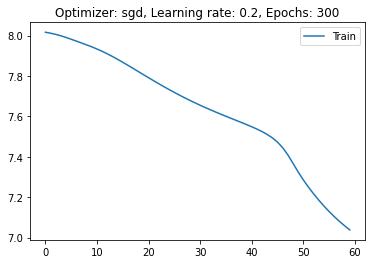

Optimizer: sgd | Learning rate: 0.3
Epoch: 5 / 300	Avg Loss: 8.01401138305664	Time elapsed: 0.3821694850921631s
Epoch: 10 / 300	Avg Loss: 8.005715370178223	Time elapsed: 0.40636706352233887s
Epoch: 15 / 300	Avg Loss: 7.994860649108887	Time elapsed: 0.4267711639404297s
Epoch: 20 / 300	Avg Loss: 7.981849670410156	Time elapsed: 0.4472072124481201s
Epoch: 25 / 300	Avg Loss: 7.968033313751221	Time elapsed: 0.46685314178466797s
Epoch: 30 / 300	Avg Loss: 7.954052448272705	Time elapsed: 0.48682498931884766s
Epoch: 35 / 300	Avg Loss: 7.9391560554504395	Time elapsed: 0.5086119174957275s
Epoch: 40 / 300	Avg Loss: 7.922433376312256	Time elapsed: 0.5285050868988037s
Epoch: 45 / 300	Avg Loss: 7.903608322143555	Time elapsed: 0.5483429431915283s
Epoch: 50 / 300	Avg Loss: 7.88296365737915	Time elapsed: 0.5726003646850586s
Epoch: 55 / 300	Avg Loss: 7.86099910736084	Time elapsed: 0.601161003112793s
Epoch: 60 / 300	Avg Loss: 7.838233470916748	Time elapsed: 0.6219801902770996s
Epoch: 65 / 300	Avg Loss: 7.8

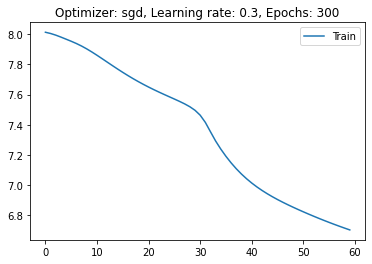



 --- Training finished ---



In [19]:
# Create model
neural_network = Simple_Network(n_input, n_output)


# performing grid search for each learning rate and model architecture
all_grid_accuracies = []
for optimizer_type in optimizer_selection:


  # Define loss
  loss_op = tf.reduce_mean(tf.keras.losses.BinaryCrossentropy()(neural_network(X), Y))
  

  optimizer_accuracies = []
  for learning_constant in learning_rate:


    # Define optimizer
    if optimizer_type == 'adam':
      optimizer = tf.train.AdamOptimizer(learning_constant).minimize(loss_op)
    elif optimizer_type == 'sgd':
      optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)


    print(f"Optimizer: {optimizer_type} | Learning rate: {learning_constant}")


    # Initializing the variables
    init = tf.global_variables_initializer()


    with tf.Session() as sess:

      sess.run(init)
      start_time = time.time()


      # Calculate loss of model
      pred = tf.nn.softmax(neural_network(X))
      loss_func = tf.keras.losses.BinaryCrossentropy()(pred, Y)


      training_loss = []
      for epoch in range(number_grid_epochs):
        sess.run(optimizer, feed_dict={X: data_train, Y: label_train})
        

        # Display the epoch
        if (epoch+1) % 5 == 0:
          loss = loss_func.eval({X: data_train, Y: label_train})
          training_loss.append(loss)
          print(f"Epoch: {epoch+1} / {number_grid_epochs}\tAvg Loss: {loss}\tTime elapsed: {time.time() - start_time}s")


      # Test model
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
      # Calculate accuracy
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      accuracy = accuracy.eval({X: data_valid, Y: label_valid})
      print("Accuracy:", accuracy)


      optimizer_accuracies.append(accuracy)

      plt.figure()
      plt.plot(training_loss, label='Train')
      plt.title(f"Optimizer: {optimizer_type}, Learning rate: {learning_constant}, Epochs: {number_grid_epochs}")
      plt.legend()
      plt.show()

  all_grid_accuracies.append(optimizer_accuracies)


print("\n\n --- Training finished ---\n")


In [20]:
# display resulting accuracies of grid search
all_accuracies = np.array(all_grid_accuracies)

index = ['Adam', 'SGD']
columns = [f'Learning rate {i}' for i in learning_rate]
grid_results_df = pd.DataFrame(all_accuracies, columns=columns, index=index)

# display grid results
grid_results_df.head()

,Learning rate 0.01,Learning rate 0.05,Learning rate 0.1,Learning rate 0.2,Learning rate 0.3
Adam,0.652,0.738,0.754,0.798,0.820
SGD,0.500,0.500,0.500,0.693,0.687


In [21]:
# best accuracy of all combinations
best_accuracy = np.max(all_accuracies)
print(f"Best accuracy: {best_accuracy}")

# retrieve best combination of hyperparameters based on best average score of each hyperparameter combination
best_optimizer_ind = np.where(all_accuracies == best_accuracy)[0][0]
best_learning_rate_ind = np.where(all_accuracies == best_accuracy)[1][0]

print("\nBest hyperparameter combination:")
print(f"  Optimizer - {optimizer_selection[best_optimizer_ind]} | Learning rate - {learning_rate[best_learning_rate_ind]}\n")

Best accuracy: 0.8199999928474426

Best hyperparameter combination:
  Optimizer - adam | Learning rate - 0.3



# K-Fold Cross Validation on best performing hyperparameter combination

In [22]:
# import cross validation libraries
from sklearn.model_selection import KFold


# prepare dataset for cross-validation
dataset_for_cv = [final_train_dataframe, final_valid_dataframe, final_test_dataframe]
dataset_for_cv = pd.concat(dataset_for_cv)


# shuffle the dataset so datapoint allocation is evenly distributed
dataset_for_cv = dataset_for_cv.sample(frac=1)


# split into data and label
dataset_for_cv_data = dataset_for_cv.drop(['Revenue_F', 'Revenue_T'], axis=1)
dataset_for_cv_label = dataset_for_cv[['Revenue_F', 'Revenue_T']]


# retrieve best combination of hyperparameters based on best average score of each hyperparameter combination
best_optimizer_ind = np.where(all_accuracies == best_accuracy)[0][0]
best_learning_rate_ind = np.where(all_accuracies == best_accuracy)[1][0]


# Create model
neural_network = Simple_Network(n_input, n_output)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.keras.losses.BinaryCrossentropy()(neural_network(X), Y))

if optimizer_selection[best_optimizer_ind] == 'adam':
  optimizer = tf.train.AdamOptimizer(learning_rate[best_learning_rate_ind]).minimize(loss_op)
elif optimizer_selection[best_optimizer_ind] == 'sgd':
  optimizer = tf.train.GradientDescentOptimizer(learning_rate[best_learning_rate_ind]).minimize(loss_op)


# perform 10-fold cross validation
folds = 10
fold_ind = 1
fold_accuracies = []
for train_index, test_index in KFold(folds).split(dataset_for_cv):

  print("\n===============================")
  print(f"Fold {fold_ind}")
  print("===============================\n")


  # prepare the dataset for training and testing
  data_train = dataset_for_cv_data.iloc[train_index]
  data_valid = dataset_for_cv_data.iloc[test_index]
  label_train = dataset_for_cv_label.iloc[train_index]
  label_valid = dataset_for_cv_label.iloc[test_index]

  data_train = np.array(data_train)
  data_valid = np.array(data_valid)
  label_train = np.array(label_train)
  label_valid = np.array(label_valid)


  # Initializing the variables
  init = tf.global_variables_initializer()


  # Calculate loss of model
  pred = tf.nn.softmax(neural_network(X))
  loss_func = tf.keras.losses.BinaryCrossentropy()(pred, Y)


  with tf.Session() as sess:

    sess.run(init)
    start_time = time.time()

    # Training epoch
    for epoch in range(number_cv_epochs):
      sess.run(optimizer, feed_dict={X: data_train, Y: label_train})
      

      # Display the epoch
      if (epoch+1) % 5 == 0:
        loss = loss_func.eval({X: data_train, Y: label_train})
        print(f"Epoch: {epoch+1} / {number_cv_epochs}\tAvg Loss: {loss}\tTime elapsed: {time.time() - start_time}s")


    # Test model
    pred = tf.nn.softmax(neural_network(X))
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    accuracy = accuracy.eval({X: data_valid, Y: label_valid})
    print("Accuracy:", accuracy)
  
    fold_accuracies.append(accuracy)
    fold_ind += 1



Fold 1

Epoch: 5 / 200	Avg Loss: 7.398528575897217	Time elapsed: 0.2837827205657959s
Epoch: 10 / 200	Avg Loss: 6.7162251472473145	Time elapsed: 0.31647205352783203s
Epoch: 15 / 200	Avg Loss: 6.404379367828369	Time elapsed: 0.3489038944244385s
Epoch: 20 / 200	Avg Loss: 6.205996513366699	Time elapsed: 0.38086915016174316s
Epoch: 25 / 200	Avg Loss: 6.055874347686768	Time elapsed: 0.4160945415496826s
Epoch: 30 / 200	Avg Loss: 5.933969497680664	Time elapsed: 0.4498124122619629s
Epoch: 35 / 200	Avg Loss: 5.820820331573486	Time elapsed: 0.49590063095092773s
Epoch: 40 / 200	Avg Loss: 5.7240447998046875	Time elapsed: 0.5290465354919434s
Epoch: 45 / 200	Avg Loss: 5.699077129364014	Time elapsed: 0.5625407695770264s
Epoch: 50 / 200	Avg Loss: 5.590395450592041	Time elapsed: 0.5945186614990234s
Epoch: 55 / 200	Avg Loss: 5.530129432678223	Time elapsed: 0.624995231628418s
Epoch: 60 / 200	Avg Loss: 5.505373001098633	Time elapsed: 0.656440019607544s
Epoch: 65 / 200	Avg Loss: 5.466458320617676	Time elap

In [23]:
# display resulting k-fold cross validation accuracies

# display result of each fold in the cross validation
print(f"Accuracy of each fold in the {folds}-fold cross validation: ")
cv_dataframe = pd.DataFrame(fold_accuracies, columns=['Accuracy per fold'])
print(cv_dataframe)

# calculate overall average and max accuracy
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
max_accuracy = np.max(fold_accuracies)
print("\n\nOverall average accuracy:", avg_accuracy)
print("Overall best accuracy:", max_accuracy)

Accuracy of each fold in the 10-fold cross validation: 
   Accuracy per fold
0           0.827225
1           0.793194
2           0.835079
3           0.832461
4           0.819372
5           0.814136
6           0.847769
7           0.790026
8           0.829396
9           0.813648


Overall average accuracy: 0.8202305853366851
Overall best accuracy: 0.847769


In [24]:
# display the internal parameter statistics of the network
neural_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 618
Trainable params: 618
Non-trainable params: 0
_________________________________________________________________


# Conduct final test on best hyperparamter combination

Epoch: 5 / 500	Avg Loss: 7.0805439949035645	Time elapsed: 0.46067357063293457s
Epoch: 10 / 500	Avg Loss: 6.720004558563232	Time elapsed: 0.4929938316345215s
Epoch: 15 / 500	Avg Loss: 6.518551349639893	Time elapsed: 0.524843692779541s
Epoch: 20 / 500	Avg Loss: 6.350723743438721	Time elapsed: 0.5582871437072754s
Epoch: 25 / 500	Avg Loss: 6.225149154663086	Time elapsed: 0.5909674167633057s
Epoch: 30 / 500	Avg Loss: 6.132354736328125	Time elapsed: 0.6225559711456299s
Epoch: 35 / 500	Avg Loss: 6.037472248077393	Time elapsed: 0.6561703681945801s
Epoch: 40 / 500	Avg Loss: 5.921844959259033	Time elapsed: 0.6926882266998291s
Epoch: 45 / 500	Avg Loss: 5.833922863006592	Time elapsed: 0.7224826812744141s
Epoch: 50 / 500	Avg Loss: 5.769542694091797	Time elapsed: 0.753497838973999s
Validation accuracy: 0.78740156
Epoch: 55 / 500	Avg Loss: 5.714163303375244	Time elapsed: 1.1433398723602295s
Epoch: 60 / 500	Avg Loss: 5.630693435668945	Time elapsed: 1.1757533550262451s
Epoch: 65 / 500	Avg Loss: 5.56427

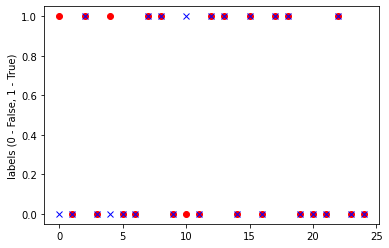

In [25]:
# retrieve best combination of hyperparameters based on best average score of each hyperparameter combination
best_optimizer_ind = np.where(all_accuracies == best_accuracy)[0][0]
best_learning_rate_ind = np.where(all_accuracies == best_accuracy)[1][0]


# Create model
neural_network = Simple_Network(n_input, n_output)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.keras.losses.BinaryCrossentropy()(neural_network(X), Y))

if optimizer_selection[best_optimizer_ind] == 'adam':
  optimizer = tf.train.AdamOptimizer(learning_rate[best_learning_rate_ind]).minimize(loss_op)
elif optimizer_selection[best_optimizer_ind] == 'sgd':
  optimizer = tf.train.GradientDescentOptimizer(learning_rate[best_learning_rate_ind]).minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()


# train final model
all_epoch_accuracies = []
all_losses = []
with tf.Session() as sess:

  sess.run(init)
  start_time = time.time()


  # Test model
  pred = tf.nn.softmax(neural_network(X))
  loss_func = tf.keras.losses.BinaryCrossentropy()(pred, Y)


  # Training epoch
  for epoch in range(number_final_epochs):
    sess.run(optimizer, feed_dict={X: data_train, Y: label_train})
    

    # Display the epoch
    if (epoch+1) % 5 == 0:
      loss = loss_func.eval({X: data_train, Y: label_train})
      print(f"Epoch: {epoch+1} / {number_final_epochs}\tAvg Loss: {loss}\tTime elapsed: {time.time() - start_time}s")
      all_losses.append(loss)


    if (epoch+1) % 50 == 0:
      # Test model on validation set
      pred = tf.nn.softmax(neural_network(X))
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
      # Calculate accuracy
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      accuracy = accuracy.eval({X: data_valid, Y: label_valid})
      print("Validation accuracy:", accuracy)
      all_epoch_accuracies.append(accuracy)

  
  # Test model on final set
  pred = tf.nn.softmax(neural_network(X))
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  accuracy = accuracy.eval({X: data_test, Y: label_test})
  print("Final accuracy:", accuracy)


  # process model prediction and label
  prediction = [0 if i[0] > i[1] else 1 for i in pred.eval({X: data_test})]
  actual_label = [0 if i[0] > i[1] else 1 for i in label_test]

  plt.plot(actual_label[:25], 'ro', prediction[:25], 'bx')
  plt.ylabel('labels (0 - False, 1 - True)')
  plt.show()


  # save model
  neural_network.save_weights("Classification_model_Epochs-{}_Accuracy-{:.3f}.h5".format(number_final_epochs, accuracy.item()))


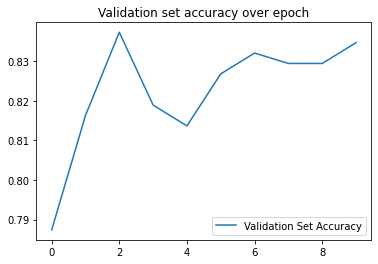

In [29]:
plt.plot(all_epoch_accuracies, label='Validation Set Accuracy')
plt.title("Validation set accuracy over epoch")
plt.legend()
plt.show()

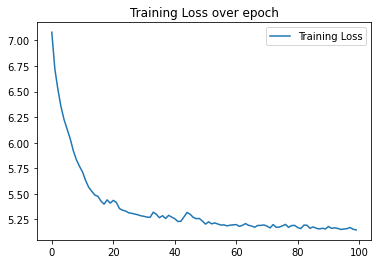

In [27]:
plt.plot(all_losses, label='Training Loss')
plt.title("Training Loss over epoch")
plt.legend()
plt.show()